# Protobuf in REST Applications Statiscal Analysis 

## Tests

There were three types of tests:

-   Baseline -\> to verify how would the application work with minimal load
-   Load -\> to verify how would the application react to a decent load
-   Stress -\> to verify how would the application react to a stress load

Both versions of the application underwent the same tests. Each type of test did the same request, the only change was the load on each one. Chaging the amount of Threads sending requests and the ammount of time the tests underwent.

Four different endpoints were used for the tests with various purposes, for a better assessment between the results:  

 * GET Plan - received by the first instance of the Plans microservice, it retrieves all plans, meaning it needs to ask the second instance for their database information. This is perfect to analyze the difference between the bytes received.\
 * GET Specific Plan - sent to the second Subscription microservice, it ask for the plan information that the user has associated to its subscription. Because the jwt token was from a user from the first microservice, the second one has to ask the first one for the information. The plan in question is saved on the database of the second instance, so the first one will need to retrieve that information. Because the request passes though various stages before returning something, it helps simulate a sitution where four instances are working for a single request.\
 * POST Subscriber - received by the first User microservice, it needs to ask the second one if the user already exits and after that send the creation request for the Subscription microservice, that proceeds to ask the Plan microservice if the plan associated with the creation request is valid.\
 * POST Plan - requests the Plan microservice to create a valid plan. For the request be accepted, the plan can not exist in neither of the instances.


## Analysis

Analyzing all of the data obtained, it is possible to verified that between the two versions of the application there is a significant difference. This affirmation can be proved by the hypotheses tests done.

Knowing that there is a significant difference between them, there is still the question of what does that difference tell.

Well, in the table, we can see that for the baseline tests Protobuf and JSON are eye to eye in elapsed time. Well in some endpoints JSON as a sightly inferior average elapsed time, being it a plus. For the bytes, when a request is done to "GET Plan", endpoint that retrieves every plan, a vast amount of information is returned, making it easier to see that Protobuf uses least amount of memory. For the throughput, even if it is a very small difference, Protobuf has the lead. Analyzing the data from the load tests, it is evident that Protobuf exceeds. With smaller elapsed times, least amount of bytes received, higher throughput, smaller error rate and more samples obtained. Adding the stress tests results to the mixer, one can perceived what the load tests pre-accessed. Protobuf has the lead in every field and JSON starts showing big weakness. Protobuf can handle more extreme situations, with error rates, compared to JSON, low and reasonable throughput.

| **Endpoint**          | **Format**   | **Test**   | **Mean Elapsed Time (ms)** | **Mean Bytes** | **Thoughput** | **Samples** | **Error (%)** | **Success Samples** |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **GET Plan**          | **Protobuf** | *Baseline* | 57.48                      | 155001.32      | 29.8          | 5368        | 0             | 5368                |
|                       |              | *Load*     | 778.82                     | 481577.09      | 20.6          | 7458        | 0             | 7458                |
|                       |              | *Stress*   | 4877.28                    | 801593.87      | 15.3          | 9242        | 0             | 9242                |
|                       |              |            |                            |                |               |             |               |                     |
|                       | **JSON**     | *Baseline* | 64.60                      | 502139.83      | 29.6          | 5324        | 0             | 5324                |
|                       |              | *Load*     | 870.53                     | 1538487.83     | 18.9          | 6858        | 0             | 6858                |
|                       |              | *Stress*   | 21092.84                   | 1340689.67     | 10.3          | 6385        | 42.65         | 3661                |
|                       |              |            |                            |                |               |             |               |                     |
| **GET Specific Plan** | **Protobuf** | *Baseline* | 31.56                      | 471.73         | 29.9          | 5366        | 0             | 5366                |
|                       |              | *Load*     | 2722.95                    | 472.52         | 20.6          | 7443        | 0.23          | 7425                |
|                       |              | *Stress*   | 140301.59                  | 502.91         | 14.2          | 9229        | 13.56         | 7977                |
|                       |              |            |                            |                |               |             |               |                     |
|                       | **JSON**     | *Baseline* | 30.46                      | 603.73         | 29.6          | 5322        | 0             | 5322                |
|                       |              | *Load*     | 3562.23                    | 604.32         | 19            | 6842        | 0.34          | 6818                |
|                       |              | *Stress*   | 127894.27                  | 1143.33        | 9.7           | 6137        | 79.91         | 1232                |
|                       |              |            |                            |                |               |             |               |                     |
| **POST Subscriber**   | **Protobuf** | *Baseline* | 228.49                     | 682.32         | 30            | 5366        | 0             | 5366                |
|                       |              | *Load*     | 24547.52                   | 679.23         | 20            | 7433        | 0.11          | 7424                |
|                       |              | *Stress*   | 51012.44                   | 681.30         | 11.5          | 7572        | 7.70          | 6988                |
|                       |              |            |                            |                |               |             |               |                     |
|                       | **JSON**     | *Baseline* | 225.98                     | 665.31         | 29.7          | 5320        | 0             | 5320                |
|                       |              | *Load*     | 26056.61                   | 662.29         | 18.4          | 6825        | 0.21          | 6810                |
|                       |              | *Stress*   | 62193.64                   | 1181.59        | 7.9           | 4986        | 86.10         | 693                 |
|                       |              |            |                            |                |               |             |               |                     |
| **POST Plan**         | **Protobuf** | *Baseline* | 13.23                      | 682.32         | 30            | 5368        | 0             | 5368                |
|                       |              | *Load*     | 372.53                     | 679.23         | 19.1          | 6866        | 0             | 6866                |
|                       |              | *Stress*   | 1825.16                    | 681.30         | 10.4          | 6243        | 0             | 6243                |
|                       |              |            |                            |                |               |             |               |                     |
|                       | **JSON**     | *Baseline* | 12.75                      | 698.04         | 29.7          | 5315        | 0             | 5315                |
|                       |              | *Load*     | 417.40                     | 690.65         | 17.4          | 6261        | 0             | 6261                |
|                       |              | *Stress*   | 30905.40                   | 1129.19        | 7.2           | 4420        | 31.06         | 3047                |

 


## Libraries

In [2]:
import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#from scipy.stats import wilcoxon

import functions.generate_graphs as gg
import functions.hyphotesis_tester as ht

## Baseline

### Conditions

Test Setup

\|- Baseline Thread Group\
\|-\|-- GET All Plan\
\|-\|-- GET Plan from User\
\|-\|-- POST Create Subscriber\
\|-\|-- POST Create Plan

Thread Options

| Number of Threads | Ramp-up period (s) | Loop Count | Duration (s) |
|-------------------|--------------------|------------|--------------|
| 10                | 5                  | Infinite   | 180          |

### Data

In [19]:
FOLDER_PATH = "baseline"
TEST_TYPE = "Baseline"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")
jPCP = pd.read_csv(f"../{FOLDER_PATH}/json_post_plan_data_v2.csv")
jPCS = pd.read_csv(f"../{FOLDER_PATH}/json_post_subs_data_v2.csv")
# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")
pPCP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_plan_data_v2.csv")
pPCS = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_subs_data_v2.csv")

pGPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")
pPCPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_plan_data_v3.csv")
pPCSv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_subs_data_v3.csv")


pSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")


pGSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf.csv")
pGJson = pd.read_csv(f"../{FOLDER_PATH}/summary_post_json.csv")
pGSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf_v3.csv")


### GET Plan

#### Grahps

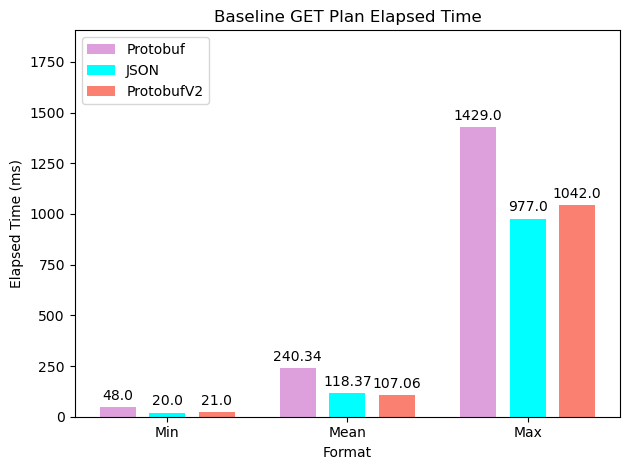

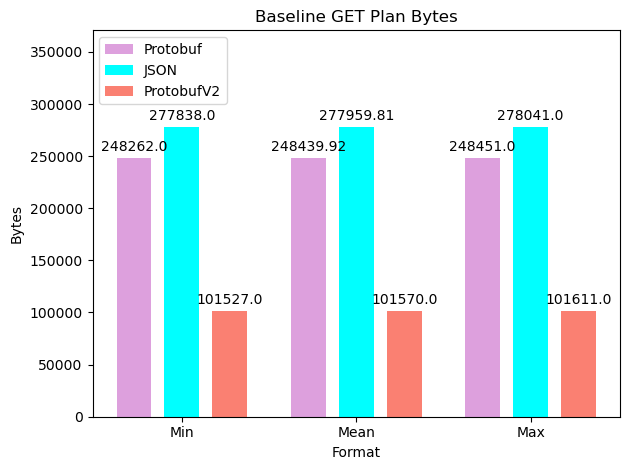

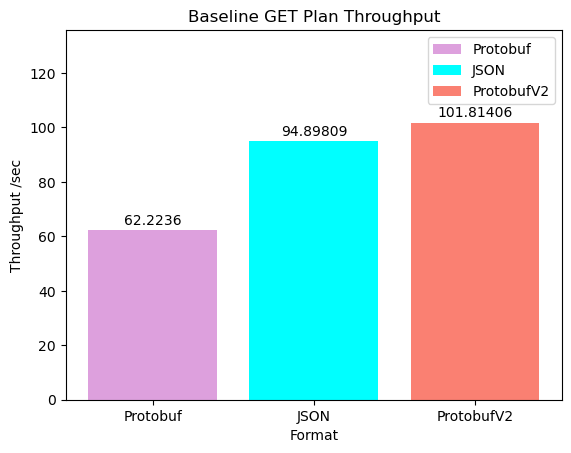

In [20]:
# gg.create_min_max_mean_graph(pGP,jGP, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")

gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,0,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

#gg.create_one_pain_plot(stats,[0,12],f"{TEST_TYPE} GET Plan Error ", "Error","Error %", percetange=True) # Error is 0 for both

### Hyphotesis

In [4]:
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGP['bytes'],jGP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 5.0497810686431185e-116 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 2.5248905343215592e-116 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### GET Specific Plan

#### Grahps

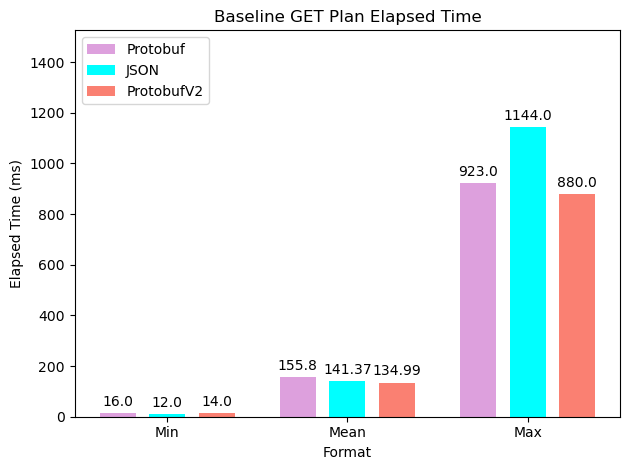

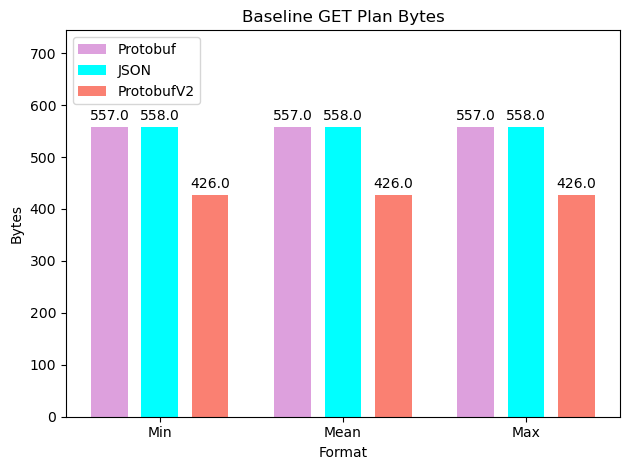

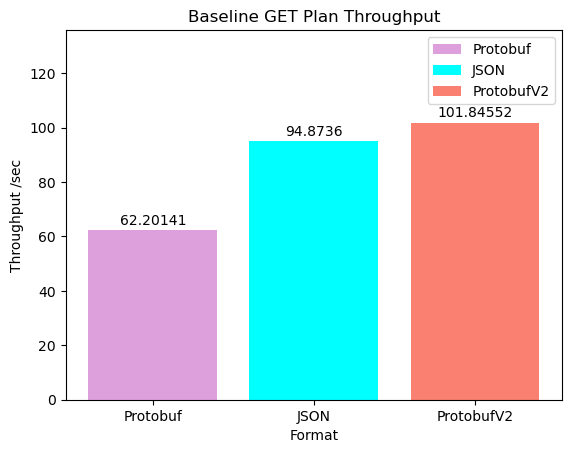

In [21]:
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,1,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")


### Hyphotesis

In [6]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGSP['bytes'],jGSP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 1.6355548297124489e-10 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.9999999999182223 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### POST Subscriber

#### Graphs

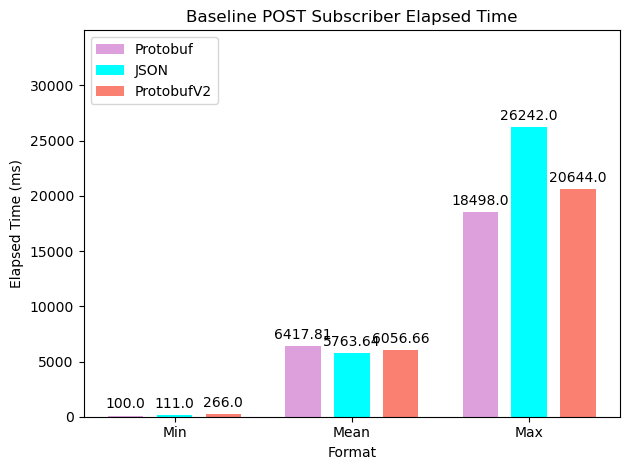

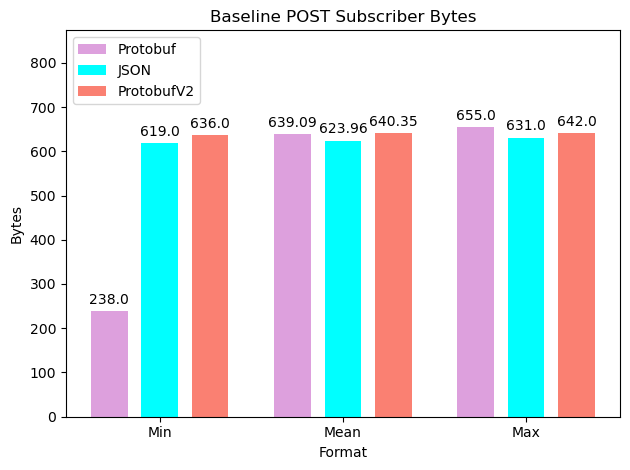

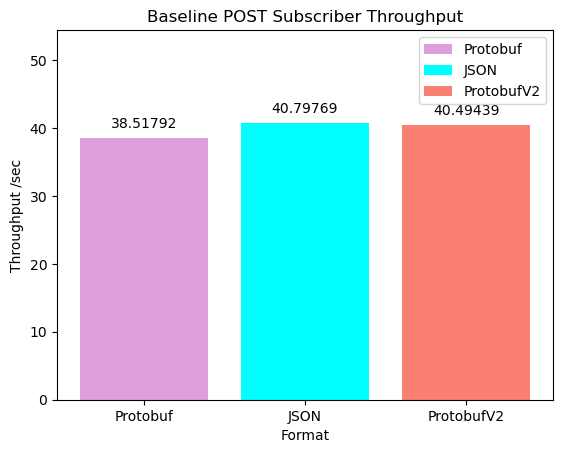

In [22]:

gg.create_min_max_mean_graph_v2(pPCS,jPCS,pPCSv2, f"{TEST_TYPE} POST Subscriber Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pPCS,jPCS,pPCSv2, f"{TEST_TYPE} POST Subscriber Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pGSummary,pGJson,pGSummaryV3,0,f"{TEST_TYPE} POST Subscriber Throughput", "Throughput","Throughput /sec")

### Hyphotesis

In [8]:
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCS['bytes'],jPCS['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 0.022688107544307463 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.9886559462278462 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster then JSON'.

p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf does not result in fewer received bytes compared to JSON'.


1.0

### POST Plan

#### Graphs

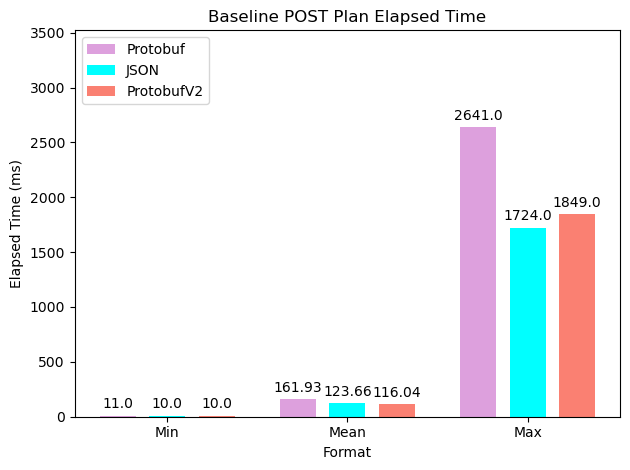

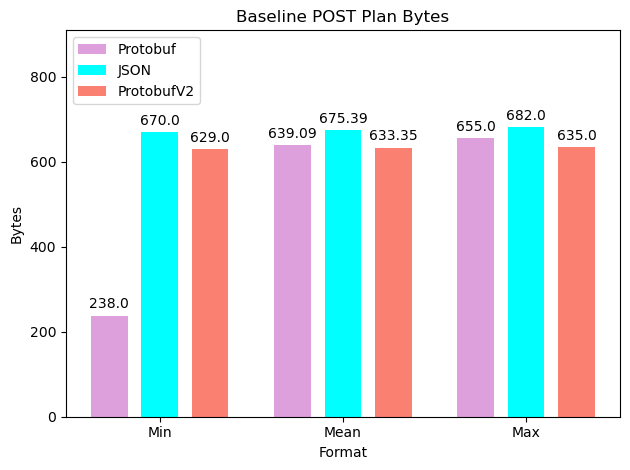

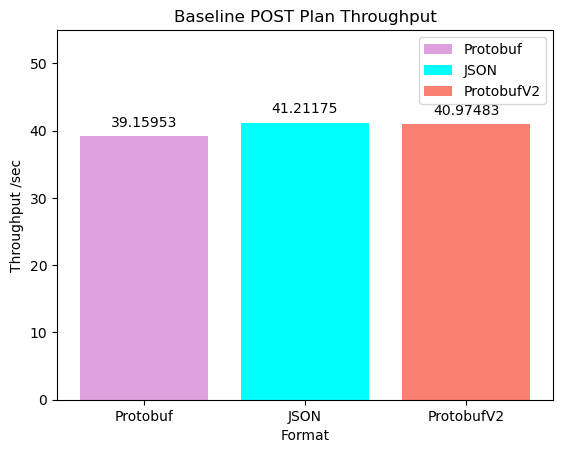

In [23]:

gg.create_min_max_mean_graph_v2(pPCP,jPCP,pPCPv2, f"{TEST_TYPE} POST Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pPCS,jPCP,pPCPv2, f"{TEST_TYPE} POST Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pGSummary,pGJson,pGSummaryV3,1,f"{TEST_TYPE} POST Plan Throughput", "Throughput","Throughput /sec")

### Hyphotesis

In [10]:
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCP['bytes'],jPCP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 2.0442644960837442e-22 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

## Load

### Conditions

Test Setup

\|- Baseline Thread Group\
\|-\|-- GET All Plan\
\|-\|-- GET Plan from User\
\|-\|-- POST Create Subscriber\
\|-\|-- POST Create Plan

Thread Options

| Number of Threads | Ramp-up period (s) | Loop Count | Duration (s) |
|-------------------|--------------------|------------|--------------|
| 600               | 30                 | Infinite   | 360          |

### Data

In [26]:
FOLDER_PATH = "load"
TEST_TYPE = "Load"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")


# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")


pGPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")


pSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")


### GET Plan

#### Grahps

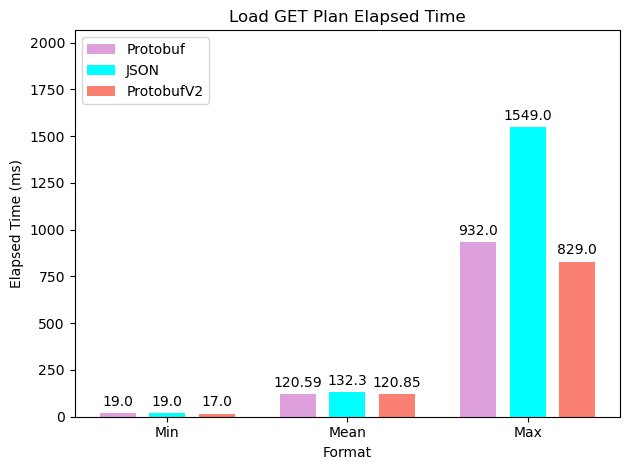

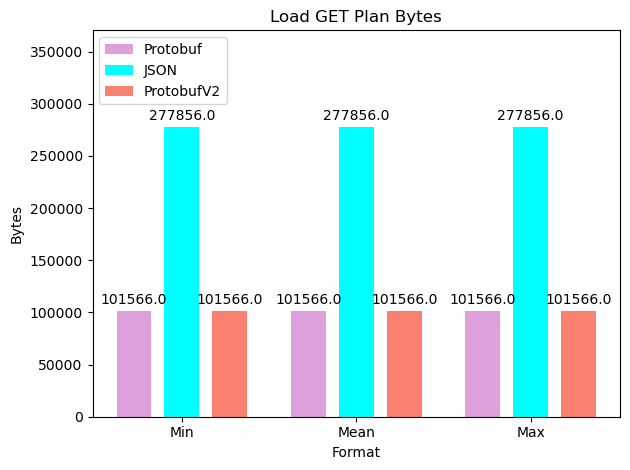

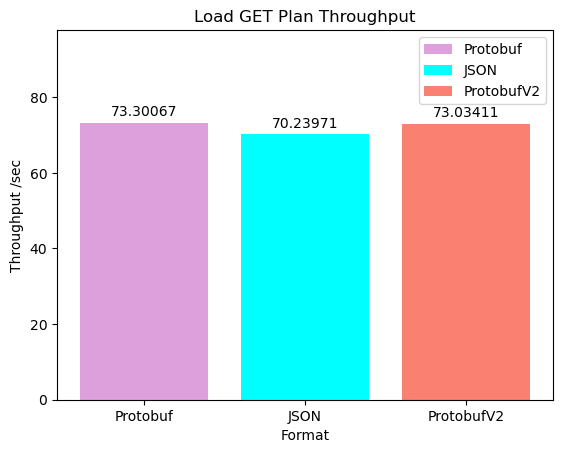

In [27]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,0,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

### Hyphotesis

In [13]:
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGP['bytes'],jGP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 1.2337552836203874e-73 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 6.168776418101937e-74 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### GET Specific Plan

#### Grahps

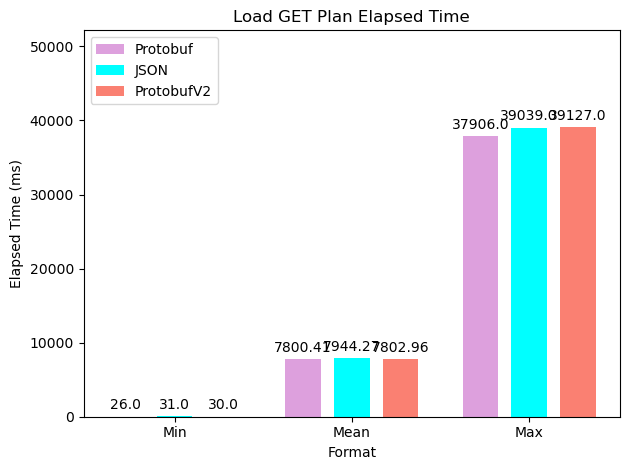

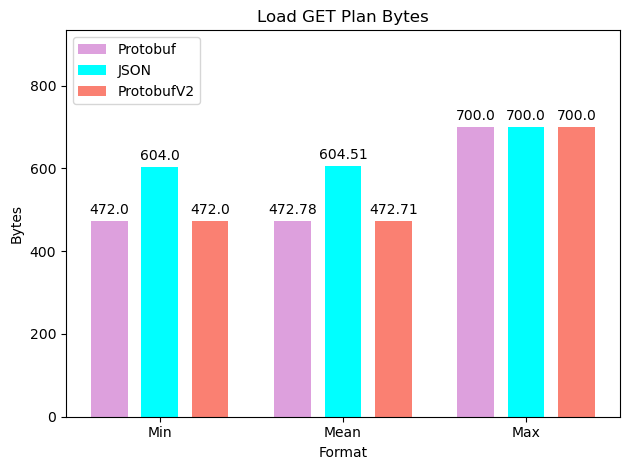

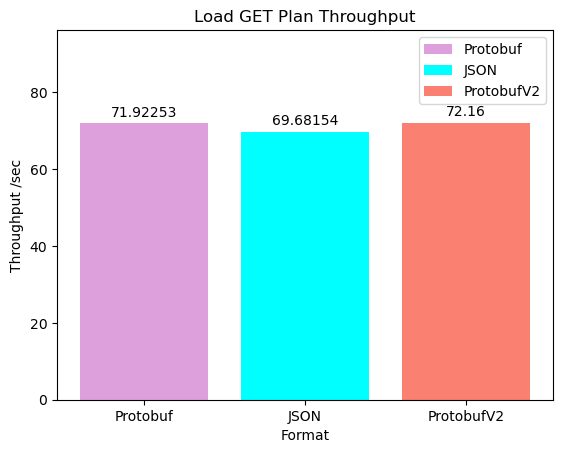

In [28]:
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,1,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")


### Hyphotesis

In [15]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGSP['bytes'],jGSP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 2.6233123620258138e-167 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 1.3116561810129069e-167 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

## Stress

### Conditions

Test Setup

\|- Baseline Thread Group\
\|-\|-- GET All Plan\
\|-\|-- GET Plan from User\
\|-\|-- POST Create Subscriber\
\|-\|-- POST Create Plan

Thread Options

| Number of Threads | Ramp-up period (s) | Loop Count | Duration (s) |
|-------------------|--------------------|------------|--------------|
| 3000              | 100                | Infinite   | 600          |

### Data

In [32]:
FOLDER_PATH = "Stress"
TEST_TYPE = "Stress"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")


# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")


pGPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")


pSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")

### GET Plan

#### Grahps

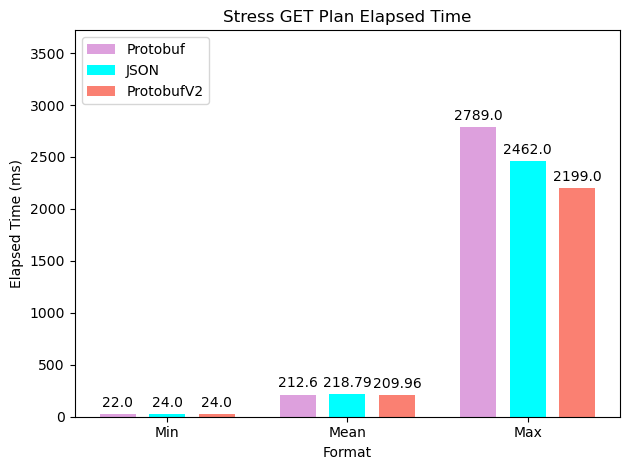

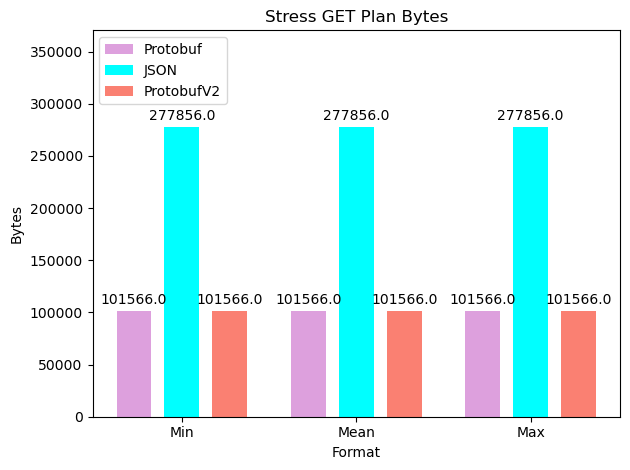

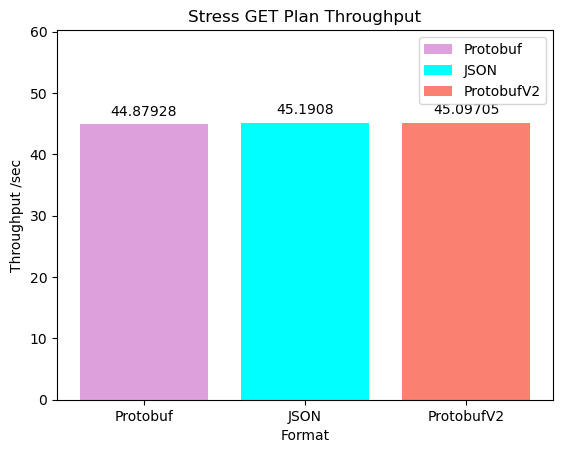

In [33]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,0,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

### Hyphotesis

In [22]:
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGP['bytes'],jGP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 1.734099496108337e-293 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 8.670497480541684e-294 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### GET Specific Plan

#### Grahps

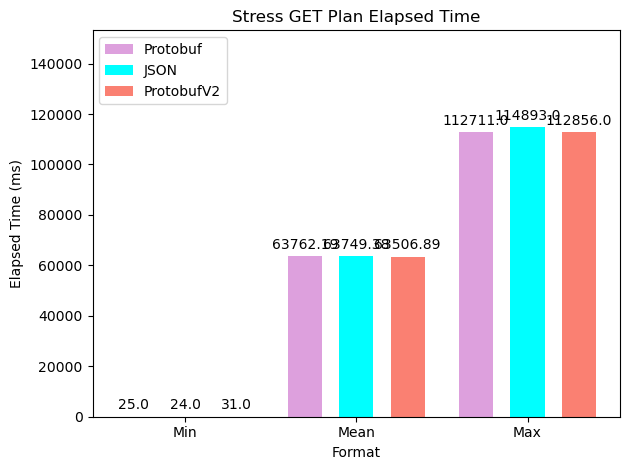

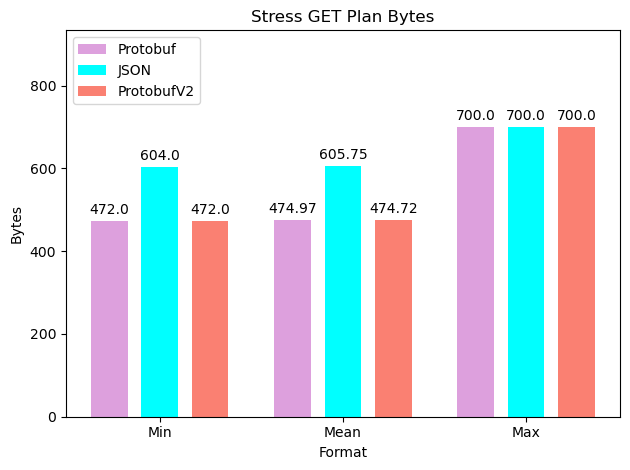

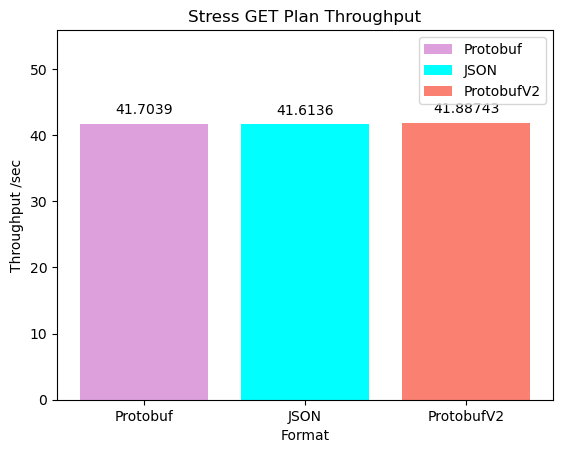

In [35]:
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.1)
gg.create_min_max_mean_graph_v2(pGSP,jGSP,pGSPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,1,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

### Hyphotesis

In [24]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGSP['bytes'],jGSP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 5.955645327365117e-62 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### POST Subscriber

#### Graphs

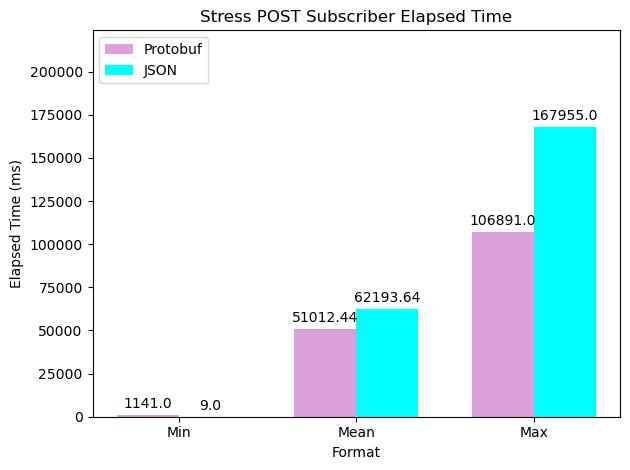

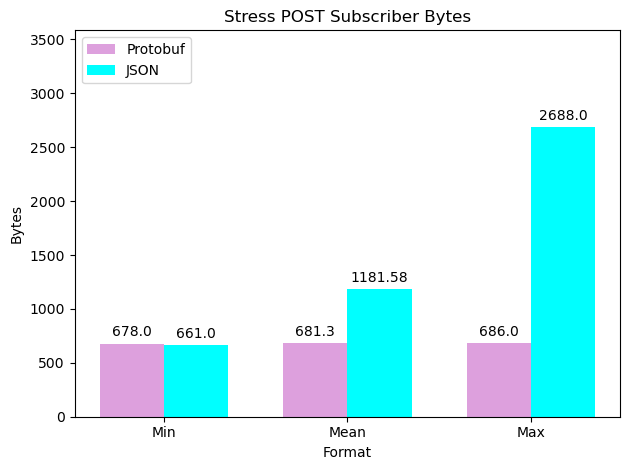

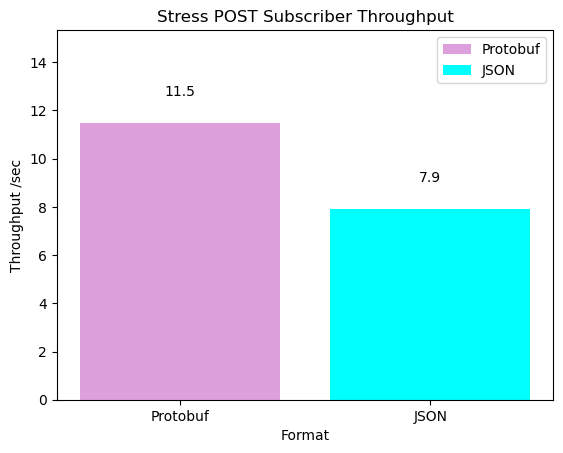

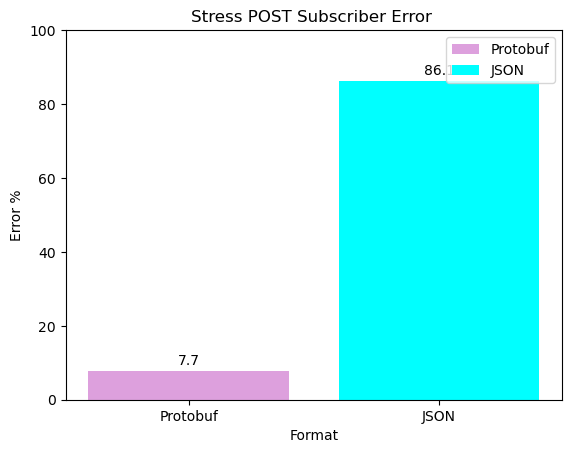

In [25]:
gg.create_min_max_mean_graph(pPCS,jPCS, f"{TEST_TYPE} POST Subscriber Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pPCS,jPCS, f"{TEST_TYPE} POST Subscriber Bytes", "bytes" ,"Bytes")
gg.create_one_pain_plot(stats,[10,22],f"{TEST_TYPE} POST Subscriber Throughput", "Throughput","Throughput /sec")
gg.create_one_pain_plot(stats,[10,22],f"{TEST_TYPE} POST Subscriber Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [26]:
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCS['bytes'],jPCS['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 0.0 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### POST Plan

#### Graphs

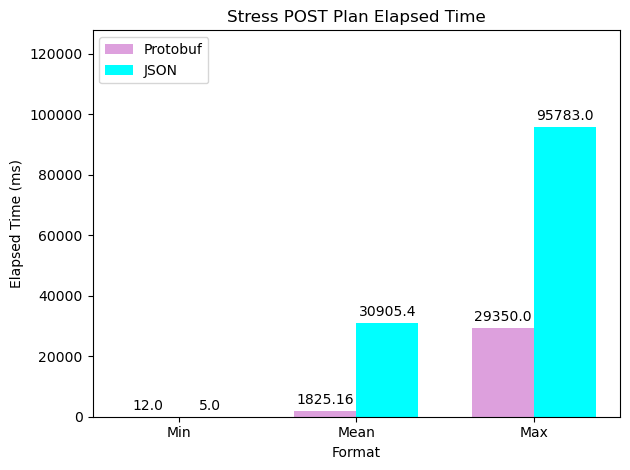

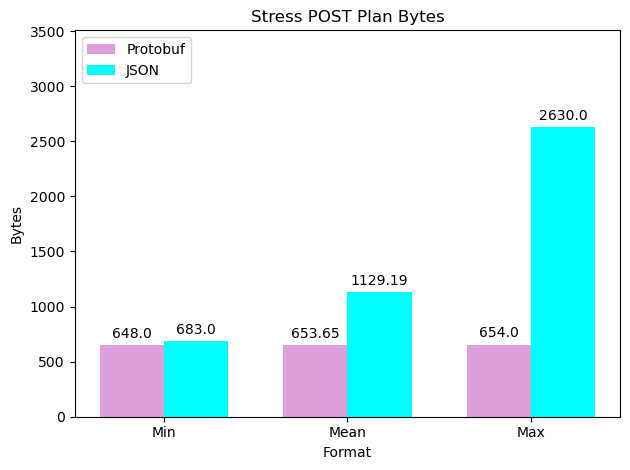

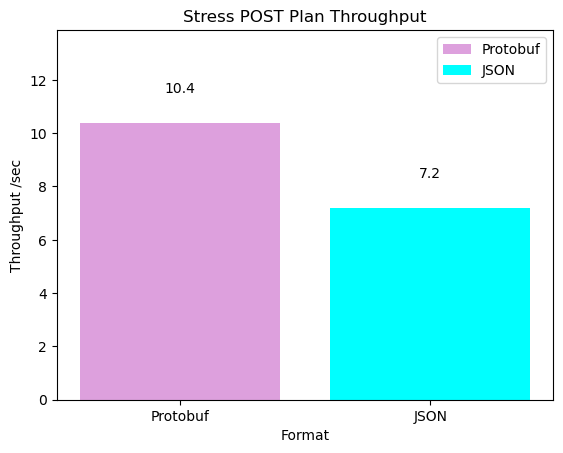

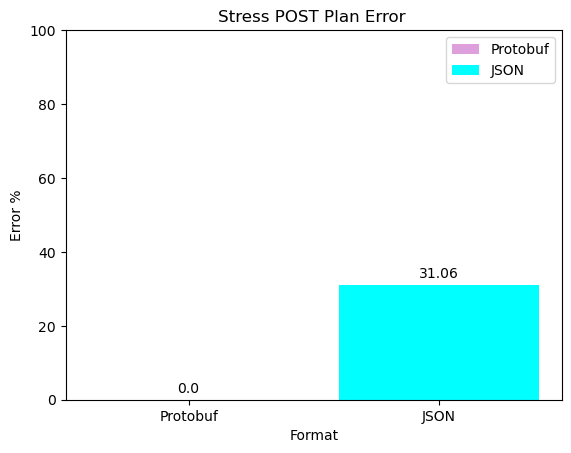

In [27]:
gg.create_min_max_mean_graph(pPCP,jPCP, f"{TEST_TYPE} POST Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pPCP,jPCP, f"{TEST_TYPE} POST Plan Bytes", "bytes" ,"Bytes")
gg.create_one_pain_plot(stats,[11,23],f"{TEST_TYPE} POST Plan Throughput", "Throughput","Throughput /sec")
gg.create_one_pain_plot(stats,[11,23],f"{TEST_TYPE} POST Plan Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [28]:
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCP['bytes'],jPCP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 0.0 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

## Resistance

### Conditions

### Data

In [29]:
FOLDER_PATH = "resistance"
TEST_TYPE = "Resistance"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_V3.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_V3.csv")
jPCP = pd.read_csv(f"../{FOLDER_PATH}/json_post_plan_data_V3.csv")
jPCS = pd.read_csv(f"../{FOLDER_PATH}/json_post_subs_data_V3.csv")
# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_V3.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_V3.csv")
pPCP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_plan_data_V3.csv")
pPCS = pd.read_csv(f"../{FOLDER_PATH}/protobuf_post_subs_data_V3.csv")

### GET Plan

#### Grahps

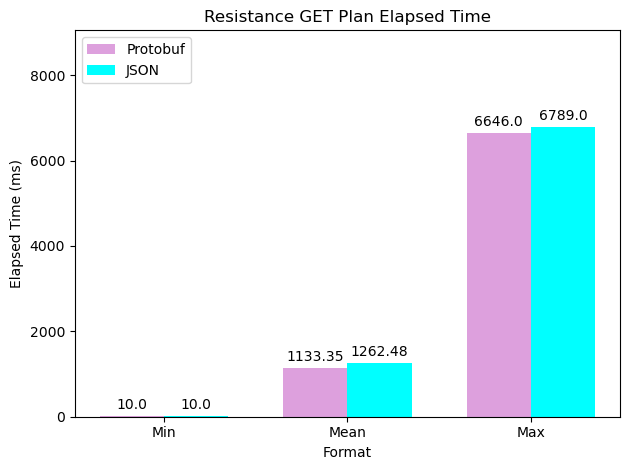

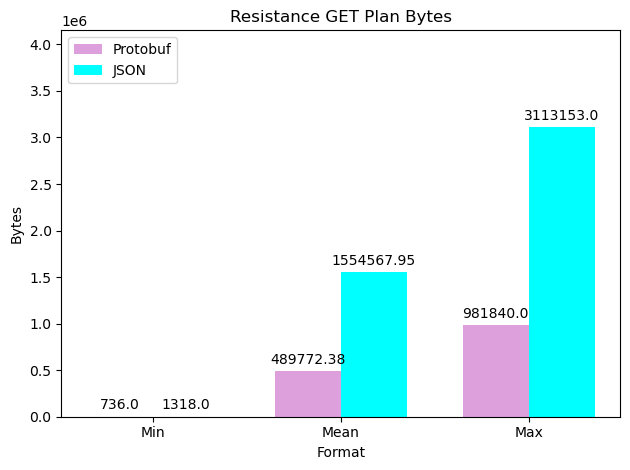

In [30]:
gg.create_min_max_mean_graph(pGP,jGP, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pGP,jGP, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes")
#gg.create_one_pain_plot(stats,[0,12],f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")
#gg.create_one_pain_plot(stats,[0,12],f"{TEST_TYPE} GET Plan Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [31]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGSP['bytes'],jGSP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 1.1664032343444537e-10 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.9999999999416799 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### GET Specific Plan

#### Grahps

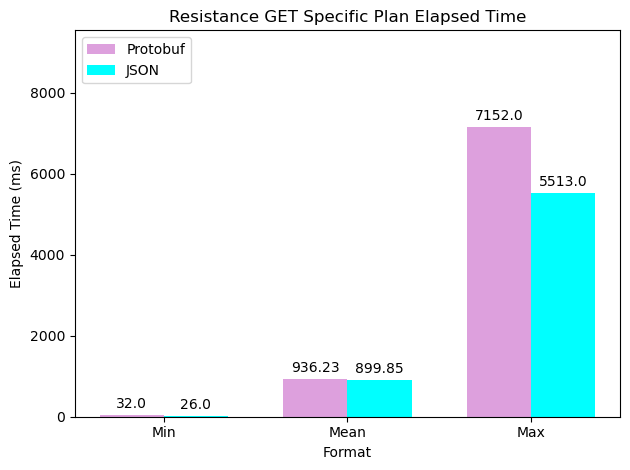

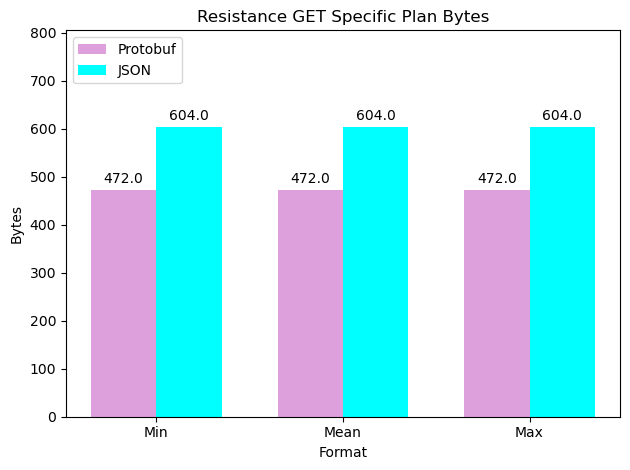

In [32]:
gg.create_min_max_mean_graph(pGSP,jGSP, f"{TEST_TYPE} GET Specific Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pGSP,jGSP, f"{TEST_TYPE} GET Specific Plan Bytes", "bytes" ,"Bytes")
#gg.create_one_pain_plot(stats,[9,20],f"{TEST_TYPE} GET Specific Plan Throughput", "Throughput","Throughput /sec")
#gg.create_one_pain_plot(stats,[9,20],f"{TEST_TYPE} GET Specific Plan Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [33]:
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pGP['elapsed'],jGP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pGP['bytes'],jGP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 7.435521465635181e-124 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 3.7177607328175904e-124 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0

### POST Subscriber

#### Graphs

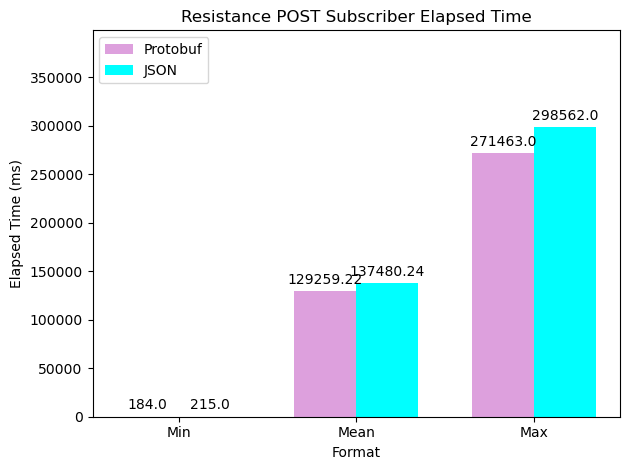

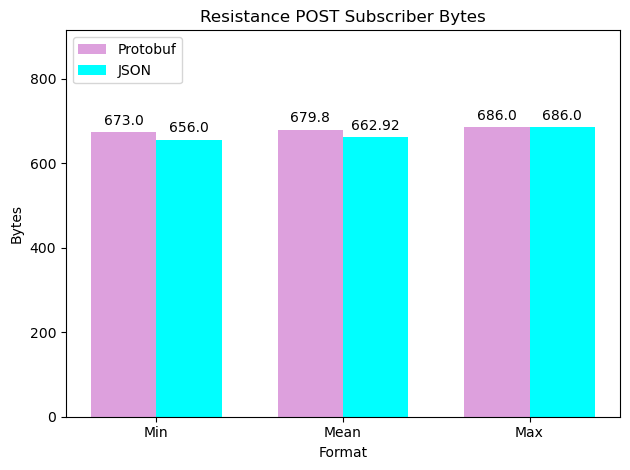

In [34]:
gg.create_min_max_mean_graph(pPCS,jPCS, f"{TEST_TYPE} POST Subscriber Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pPCS,jPCS, f"{TEST_TYPE} POST Subscriber Bytes", "bytes" ,"Bytes")
#gg.create_one_pain_plot(stats,[6,18],f"{TEST_TYPE} POST Subscriber Throughput", "Throughput","Throughput /sec")
#gg.create_one_pain_plot(stats,[6,18],f"{TEST_TYPE} POST Subscriber Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [35]:
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCS['elapsed'],jPCS['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCS['bytes'],jPCS['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 0.0 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf does not result in fewer received bytes compared to JSON'.


1.0

### POST Plan

#### Graphs

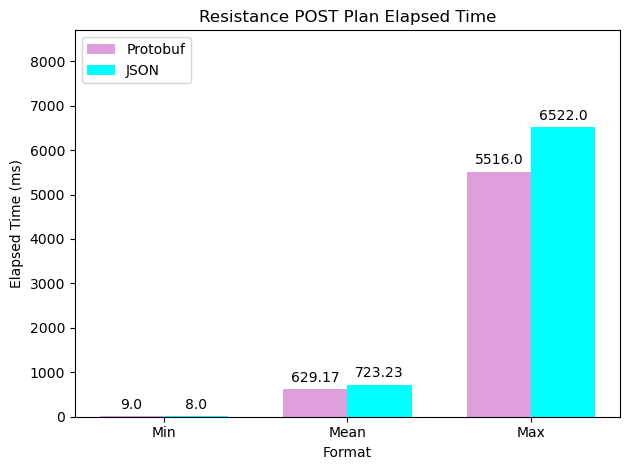

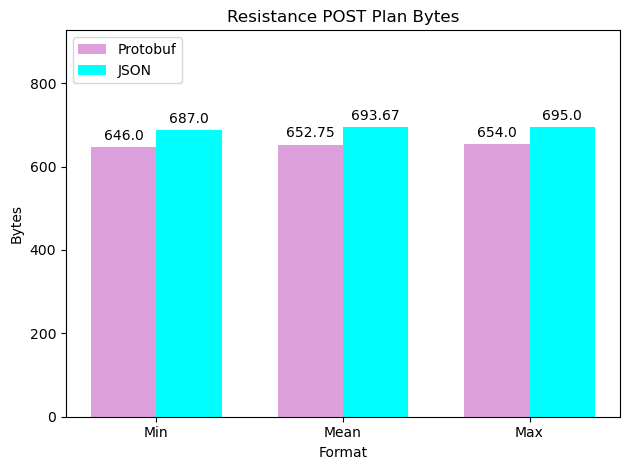

In [36]:
gg.create_min_max_mean_graph(pPCP,jPCP, f"{TEST_TYPE} POST Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")
gg.create_min_max_mean_graph(pPCP,jPCP, f"{TEST_TYPE} POST Plan Bytes", "bytes" ,"Bytes")
#gg.create_one_pain_plot(stats,[7,19],f"{TEST_TYPE} POST Plan Throughput", "Throughput","Throughput /sec")
#gg.create_one_pain_plot(stats,[7,19],f"{TEST_TYPE} POST Plan Error ", "Error","Error %", percetange=True) 

### Hyphotesis

In [37]:
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")
ht.hyphtesis_test([pPCP['elapsed'],jPCP['elapsed']],"Protobuf is not faster then JSON", "Protobuf is faster then JSON",'less')
ht.hyphtesis_test([pPCP['bytes'],jPCP['bytes']],"Protobuf does not result in fewer received bytes compared to JSON", "Protobuf results in fewer received bytes compared to JSON",'less')


p_value - 4.963365999716648e-41 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.

p_value - 2.481682999858324e-41 < 0.5 - H0 is rejected, therefore 'Protobuf is faster then JSON'.

p_value - 0.0 < 0.5 - H0 is rejected, therefore 'Protobuf results in fewer received bytes compared to JSON'.


0.0